In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/Users/seggensperger/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [13]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

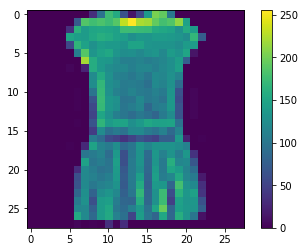

In [16]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

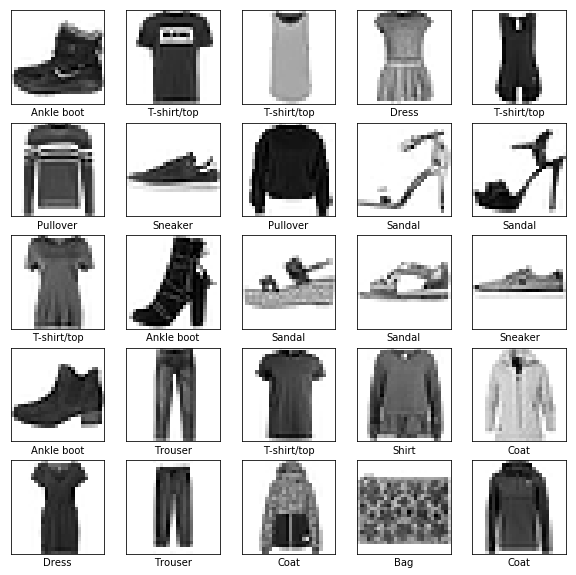

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [77]:
# flatten input from 28x28 matrix to 1x784 vector
# then two layers, first with 128 notes with relu activation -- why 128 nodes? 
# second with 10 nodes corresponding to 10 categories, softmax activation
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# optimizer = how the model will be upated based on output from loss function
# how accurate the model is as it is trained
# accuracy is simply the percent of images correctly categorized
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# what is the AdamOptimizer? see: https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam
# after trying all existing optimizers in keras.optimizers and tf.train modules, tf.train.AdamOptimizer is 
# actually the best performing
# what is the sparse_categorical_crossentropy loss function?
# what other metrics are there beyone accuracy?



In [78]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.5013 - acc: 0.8239
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.3749 - acc: 0.8650
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.3357 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3117 - acc: 0.8862
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.2934 - acc: 0.8927


In [79]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 42us/step
Test accuracy: 0.8701


In [56]:
tf_train_AdamOptimizer = {1: .8235, 2: .8650, 3: .8780, 4: .8856, 5: .8911, 'test': .8705}
keras_optimizers_Adam = {1: .8239, 2: .8650, 3: .8776, 4: .8862, 5: .8927, 'test': .8701}

In [ ]:
tf.train.AdadeltaOptimizer

In [38]:
predictions = model.predict(test_images)
predictions[0]

array([3.28592137e-07, 6.02414779e-14, 1.13863176e-10, 7.30202520e-13,
       1.16542301e-13, 5.05642826e-03, 2.28490138e-09, 1.97261386e-03,
       1.95607197e-10, 9.92970645e-01], dtype=float32)

In [82]:
np.argmax(predictions[0])

9

In [83]:
test_labels[0]

9

In [84]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

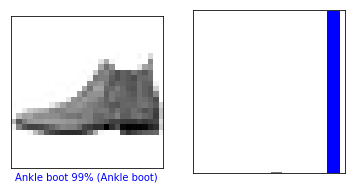

In [85]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

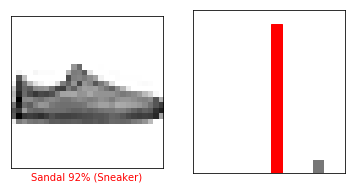

In [86]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

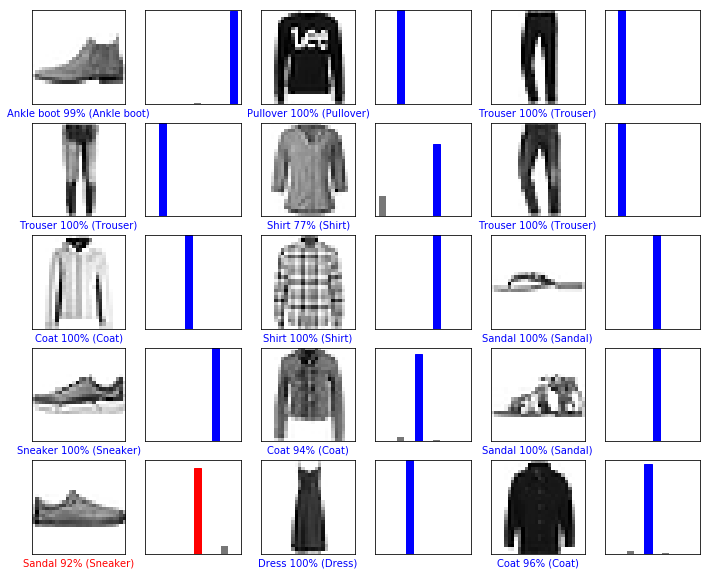

In [87]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [46]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [47]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [48]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.28591511e-07 6.02417083e-14 1.13863606e-10 7.30202520e-13
  1.16542301e-13 5.05643571e-03 2.28490138e-09 1.97261199e-03
  1.95607183e-10 9.92970645e-01]]


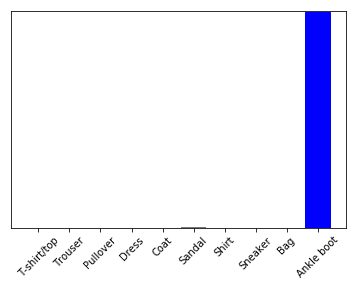

In [49]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [50]:
np.argmax(predictions_single[0])

9

In [92]:
len(predictions)

10000

In [93]:
len(test_labels)

10000

In [94]:
predictions

array([[3.28592137e-07, 6.02414779e-14, 1.13863176e-10, ...,
        1.97261386e-03, 1.95607197e-10, 9.92970645e-01],
       [5.17741173e-05, 4.97080438e-16, 9.99517322e-01, ...,
        4.57558611e-22, 1.29029410e-13, 3.46325616e-13],
       [1.68129417e-11, 1.00000000e+00, 5.16506758e-15, ...,
        8.68654417e-27, 2.29606942e-13, 2.94094829e-29],
       ...,
       [6.50861921e-07, 2.26672290e-16, 6.11914353e-10, ...,
        1.23763531e-15, 9.99999166e-01, 5.70812680e-19],
       [8.85695326e-13, 9.99999881e-01, 1.67800520e-13, ...,
        2.40800186e-19, 7.09072384e-12, 6.30638446e-18],
       [1.32024056e-07, 7.25247917e-11, 4.57028548e-08, ...,
        2.33505634e-05, 3.10261328e-08, 2.97666702e-07]], dtype=float32)

In [99]:
pred = np.argmax(predictions, axis=1)

In [98]:
conf = np.max(predictions, axis=1)

In [109]:
combined = np.column_stack((pred, conf))

In [110]:
combined

array([[9.        , 0.99297065],
       [2.        , 0.99951732],
       [1.        , 1.        ],
       ...,
       [8.        , 0.99999917],
       [1.        , 0.99999988],
       [5.        , 0.99997604]])

In [111]:
import pandas as pd

In [112]:
df = pd.DataFrame(combined)

In [113]:
df.head()

,0,1
0,9.0,0.992971
1,2.0,0.999517
2,1.0,1.000000
3,1.0,1.000000
4,6.0,0.772578


In [116]:
summary = df.groupby(0).mean()

In [121]:
summary['max'] = df.groupby(0).max()
summary['min'] = df.groupby(0).min()
summary['count'] = df.groupby(0).count()

In [122]:
summary

,1,max,min,count
0,,,,
0.0,0.859566,1.000000,0.276614,986
1.0,0.992509,1.000000,0.366834,976
2.0,0.840859,0.999921,0.298164,994
3.0,0.921206,1.000000,0.252560,969
4.0,0.843008,0.999861,0.269904,1067
5.0,0.986516,1.000000,0.509463,996
6.0,0.789117,0.999998,0.298575,1000
7.0,0.967028,1.000000,0.414608,1005
8.0,0.985948,1.000000,0.350390,997


In [125]:
summary['class_names'] = class_names

In [126]:
summary

,1,max,min,count,class_names
0,,,,,
0.0,0.859566,1.000000,0.276614,986,T-shirt/top
1.0,0.992509,1.000000,0.366834,976,Trouser
2.0,0.840859,0.999921,0.298164,994,Pullover
3.0,0.921206,1.000000,0.252560,969,Dress
4.0,0.843008,0.999861,0.269904,1067,Coat
5.0,0.986516,1.000000,0.509463,996,Sandal
6.0,0.789117,0.999998,0.298575,1000,Shirt
7.0,0.967028,1.000000,0.414608,1005,Sneaker
8.0,0.985948,1.000000,0.350390,997,Bag


next step, is to confirm is trouser has most accurate examples, and if shirt has least (as depicted in average accuracy) not necessarily expected, but interesting nonetheless